In [2]:
import sys
sys.path.append('../src')

import numpy as np
import math
import matplotlib.pyplot as plt
import os
import time

from fitmodel import RunFit

[[Model]]
    Model(Freq19580_Frame2_Exp100.csv)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 0
    # data points      = 2049
    # variables        = 0
    chi-square         = 13299064.8
    reduced chi-square = 6490.51481
    Akaike info crit   = 17986.3210
    Bayesian info crit = 17986.3210
##  Warning: uncertainties could not be estimated:
[[Variables]]
    N:        39.16 (fixed)
    m:        1.2899 (fixed)
    delta_T:  23.27717 (fixed)
    tw:       13.095 (fixed)
    tau0:     0 (fixed)
    A:        326.44 (fixed)
    b:        0 (fixed)
    Z:        964.7024 (fixed)


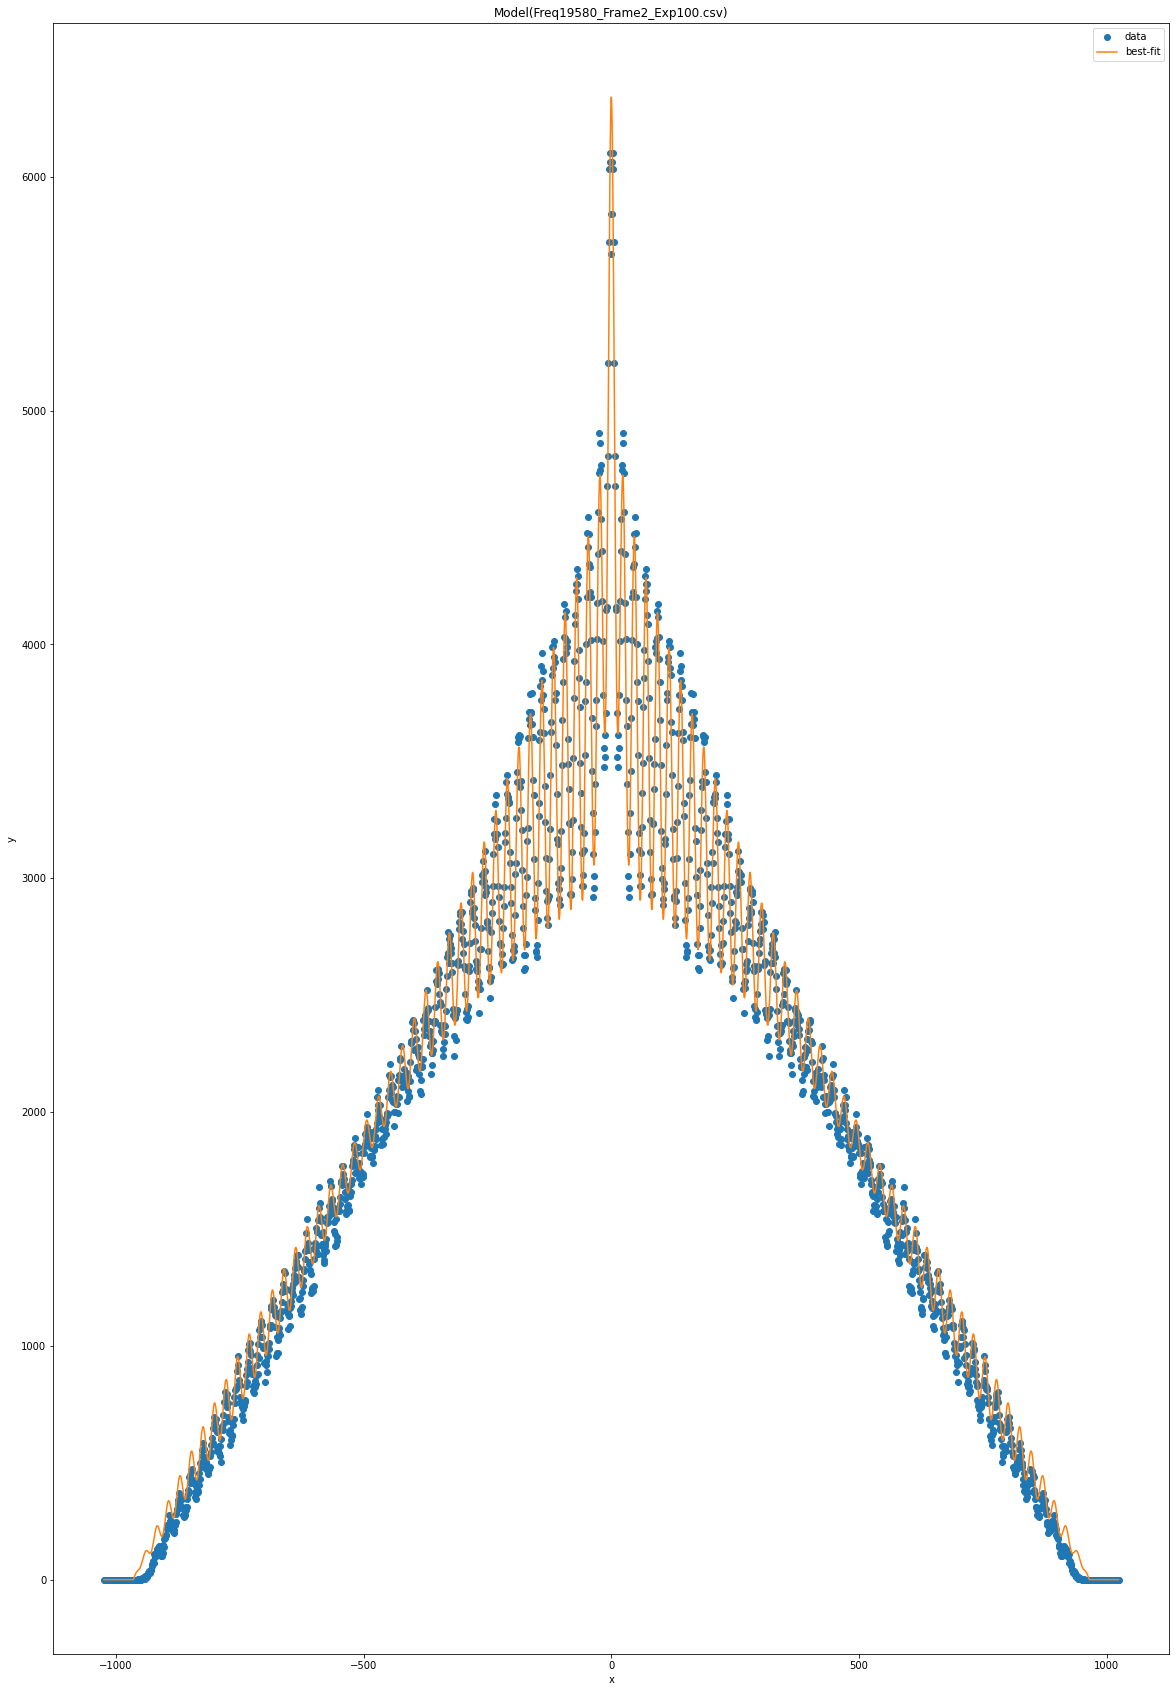

savepath /mnt/e/Data/JensenLab/VarySyncFine/analysis/data_fittingmodel/Freq19580_Frame2_Exp100.csv


In [5]:
consts = {
    'FrameTime': 2e-6,
    'LaserPeriod': 1/20.07e6,
    'TimeBinLength': 54.32e-12
}

var = {
    'CameraPeriod': None
}

config = {
    'FitRadius': (-1024, 1024),
}
# test = RunFit(init_params, fpath, fitradius=900)
dirpath = '/mnt/e/Data/JensenLab/VarySyncFine/analysis/data_time_coincidence_count'
fpaths = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]
fpaths = (sorted(fpaths))
model_result = None
for fpath in fpaths:
    CameraFreq = os.path.basename(fpath).split('_')[0].replace('Freq', '')
    CameraFreq = int(CameraFreq)
    # if CameraFreq % 100 != 0: continue
    if CameraFreq not in (19580, ): continue
    # if CameraFreq != 19960: continue
    var['CameraPeriod'] = 1/(CameraFreq*1e3)
    init_params = {
        'N': {
            'value': consts['FrameTime']/var['CameraPeriod'],
            'vary': False,
        },
        'm': {
            'value': 1.2899,
            'vary': False,
        },
        'delta_T': {
            'value': (var['CameraPeriod']-consts['LaserPeriod'])/consts['TimeBinLength'],
            'value': 23.2771710 ,
            'vary' : False,
        },
        'tw': {
            'value': 13.095,
            'vary': False,
        },
        'tau0': {
            'value': 0,
            'vary': False,
        },
        'A': {
            'value': 326.44,
            'vary': False,
        },
        'b': {
            'value': 0,
            'vary': False,
        },
        'Z': {
            'value': 1024*var['CameraPeriod']/55e-9,
            'value': 964.702446 ,
            'vary': False,
        },
    }
    if model_result:
        init_params['m']['value'] = model_result.params['m'].value
        init_params['tw']['value'] = model_result.params['tw'].value
        init_params['A']['value'] = model_result.params['A'].value
        init_params['b']['value'] = model_result.params['b'].value
    
    model = RunFit(init_params, fpath, fitradius=config['FitRadius'])
    model_result = model.run_fit()
    model.save_fit('/mnt/e/Data/JensenLab/VarySyncFine/analysis/data_fittingmodel')
    # model.save_fit('/mnt/e/Data/JensenLab/VarySyncFine/analysis/data_fittingmodel', 'test_g1.csv')